In [50]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [52]:
monthly_ws = pd.read_excel("tangail_monthly_analysis.xls")

In [53]:
monthly_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              12 non-null     int64  
 1   MONTH                   12 non-null     object 
 2   MAXOFTSVALUE_UPDATED_x  12 non-null     float64
 3   MAXOFTSVALUE_UPDATED_y  12 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 512.0+ bytes


In [54]:
monthly_ws = monthly_ws.drop(monthly_ws.columns[monthly_ws.columns.str.contains('unnamed',case = False)],axis = 1)

In [55]:
monthly_ws.columns = ["Month","Average of Maximum","Maximum"]

In [56]:
monthly_ws

,Month,Average of Maximum,Maximum
0,Jan,9.965040,18.520000
1,Feb,13.503833,22.223750
2,Mar,15.170639,48.151667
3,Apr,19.788542,44.447917
4,May,21.709181,37.040000
5,Jun,17.826931,29.631667
6,Jul,21.153583,151.863750
7,Aug,15.103708,35.187917
8,Sep,15.168889,29.631667
9,Oct,14.421167,35.187917


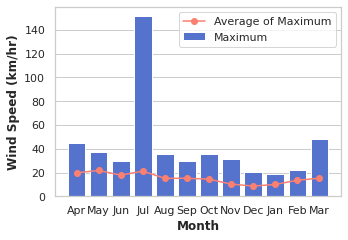

In [57]:
month_order = ["Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"]

sns.set(rc={'figure.figsize':(5,3.5)})
sns.set_style("whitegrid")

fig, ax = plt.subplots()
ax = sns.barplot(x="Month", hue = None, y="Maximum",data=monthly_ws, order=["Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"], color = "royalblue", label = "Maximum")

new_df = monthly_ws.set_index(monthly_ws["Month"]).loc[month_order]

plt.plot(new_df["Average of Maximum"], color = 'salmon',marker = 'o', label = "Average of Maximum")

plt.legend()
plt.xlabel("Month", fontweight="semibold")
plt.ylabel("Wind Speed (km/hr)", fontweight="semibold")
plt.tight_layout()
plt.savefig("tangail_wind_speed.jpg",dpi = 500)
plt.show()